# Importing Neccessary Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


Loading Data into a pandas DataFrame


In [2]:
himalayan_peaks = pd.read_csv('Himalayan_Peaks.csv')

In [3]:
#Displaying a preview of the dataset
himalayan_peaks.head()

,PeakID,Hgt(m),PeakName(s),Location(Himals)
0,ACHN,6055,"Aichyn(Aychin,Ashvin)",Nalakankar/Chandi/Changla
1,AMAD,6814,AmaDablam(AmaiDablang),Khumbu
2,AMOT,6393,Amotsang(Amatson),Damodar
3,AMPG,5630,AmphuGyabjen,Khumbu
4,AMPH,6740,AmphuI,Khumbu


In [4]:
#Displaying the structure information
himalayan_peaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PeakID            479 non-null    object
 1   Hgt(m)            479 non-null    int64 
 2   PeakName(s)       479 non-null    object
 3   Location(Himals)  479 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.1+ KB


In [5]:
himalayan_peaks.describe()

,Hgt(m)
count,479.000000
mean,6632.561587
std,648.039118
min,6.000000
25%,6228.000000
50%,6552.000000
75%,6897.000000
max,8849.000000


In [6]:
#Displaying all the dataset
himalayan_peaks

,PeakID,Hgt(m),PeakName(s),Location(Himals)
0,ACHN,6055,"Aichyn(Aychin,Ashvin)",Nalakankar/Chandi/Changla
1,AMAD,6814,AmaDablam(AmaiDablang),Khumbu
2,AMOT,6393,Amotsang(Amatson),Damodar
3,AMPG,5630,AmphuGyabjen,Khumbu
4,AMPH,6740,AmphuI,Khumbu
...,...,...,...,...
474,YARW,6644,Yarwa,Api/ByasRisi/Guras
475,YAUP,6422,Yaupa,Makalu
476,YNGS,6863,YangraKangriSouth(GaneshISouth),Ganesh/Shringi
477,YOKO,6423,Yokopahar(NampaVIII),Api/ByasRisi/Guras


Handling Missing Values 

In [7]:
# Checking rows with missing values
himalayan_peaks.isna().sum()

PeakID              0
Hgt(m)              0
PeakName(s)         0
Location(Himals)    0
dtype: int64

In [8]:
himalayan_peaks["Location(Himals)"].unique()

array(['Nalakankar/Chandi/Changla', 'Khumbu', 'Damodar',
       'Kangchenjunga/Simhalila', 'Annapurna', 'Api/ByasRisi/Guras',
       'Mukut/Mustang', 'Rolwaling', 'Manaslu/Mansiri', 'Jugal',
       'Kanjiroba', 'Janak/OhmiKangri', 'Makalu', 'Peri',
       'Ganesh/Shringi', 'Kanti/Palchung', 'Dhaulagiri', 'Jongsang',
       'Langtang', 'Saipal', 'Manaslu'], dtype=object)

Adding new features: Difficulty Level and Popularity assuming that, 'Difficulty_Level' and 'Popularity' columns exist in the dataset. If not,it will create a synthetic values for demonstration purposes

In [9]:
#Scaling Difficulty_level from: 1-5. Here 1 is the most easiest peaks and 5 is the most most challenging peaks to climb

if 'Difficulty_Level' not in himalayan_peaks.columns:
    himalayan_peaks['Difficulty_Level'] = np.random.randint(1, 6, size=len(himalayan_peaks))  
    
    
#Scaling from 1-100 ranges where 1 represents the most least popular and 100 means the most popular peaks
if 'Popularity' not in himalayan_peaks.columns:
    himalayan_peaks['Popularity'] = np.random.randint(1, 101, size=len(himalayan_peaks))

Normalizing features for clustering

In [10]:
#Creating a Function to normalize the values in a specific column of a dataframe
def normalize_column(dataframe, column_name):
#For Finding the maximum value in the specified column    
    max_value = dataframe[column_name].max()
#For Finding the minimum value    
    min_value = dataframe[column_name].min()
    
#Normalizing the column values using the formula, scaling the values from a range of 0 to 1   
    return dataframe[column_name].apply(lambda x: (x - min_value) / (max_value - min_value))


Normalizing and storing results in new columns

In [11]:
himalayan_peaks['Normalized_Hgt'] = normalize_column(himalayan_peaks, 'Hgt(m)')
himalayan_peaks['Normalized_Difficulty'] = normalize_column(himalayan_peaks, 'Difficulty_Level')
himalayan_peaks['Normalized_Popularity'] = normalize_column(himalayan_peaks, 'Popularity')

Encoding 'Location(Himals)' into numerical values

In [12]:
unique_locations = list(himalayan_peaks['Location(Himals)'].unique())
location_encoding = {loc: idx for idx, loc in enumerate(unique_locations)}
himalayan_peaks['Encoded_Location'] = himalayan_peaks['Location(Himals)'].apply(
    lambda x: location_encoding[x]
)

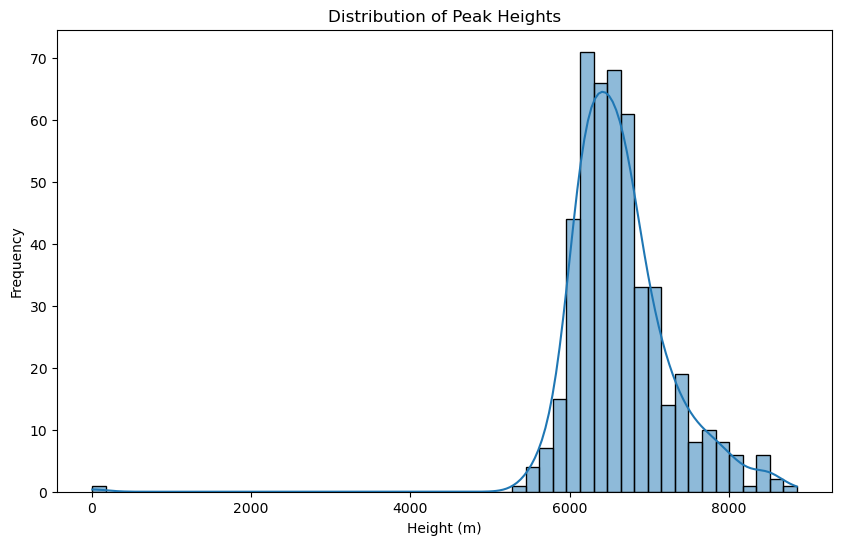

In [13]:
#Exploring Data Distribution
plt.figure(figsize=(10, 6))
sns.histplot(himalayan_peaks['Hgt(m)'], kde=True)
plt.title('Distribution of Peak Heights')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.show()


C:\Users\DEXY GURUNG\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


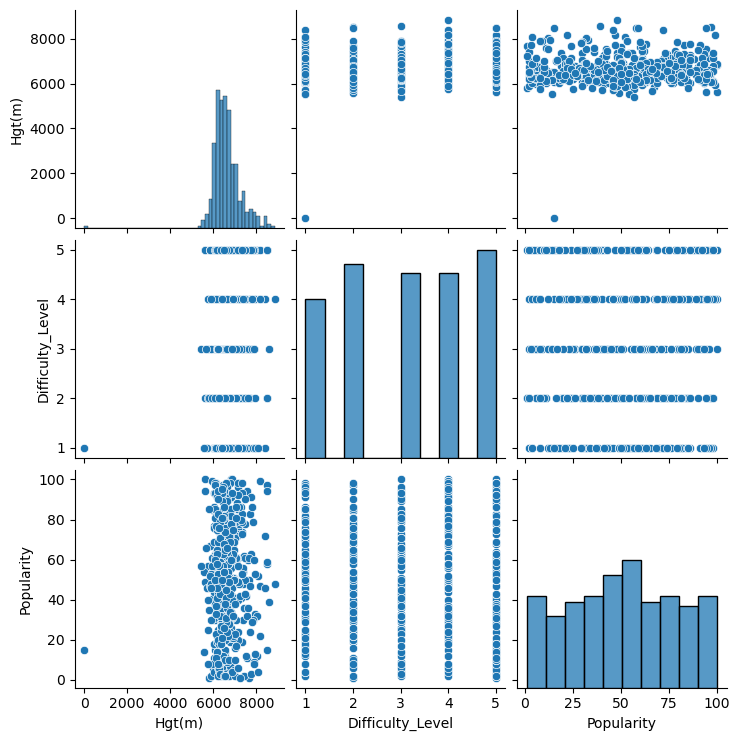

In [14]:
# Visualizing Relationships
sns.pairplot(himalayan_peaks[['Hgt(m)', 'Difficulty_Level', 'Popularity']])
plt.show()


Applying Clustering using (K-Means)

In [15]:
clustering_features = himalayan_peaks[['Normalized_Hgt', 'Encoded_Location', 'Normalized_Difficulty', 'Normalized_Popularity']]

In [16]:
#Applying KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
himalayan_peaks['Cluster'] = kmeans.fit_predict(clustering_features)

C:\Users\DEXY GURUNG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Using  matplotlib for a better visualization

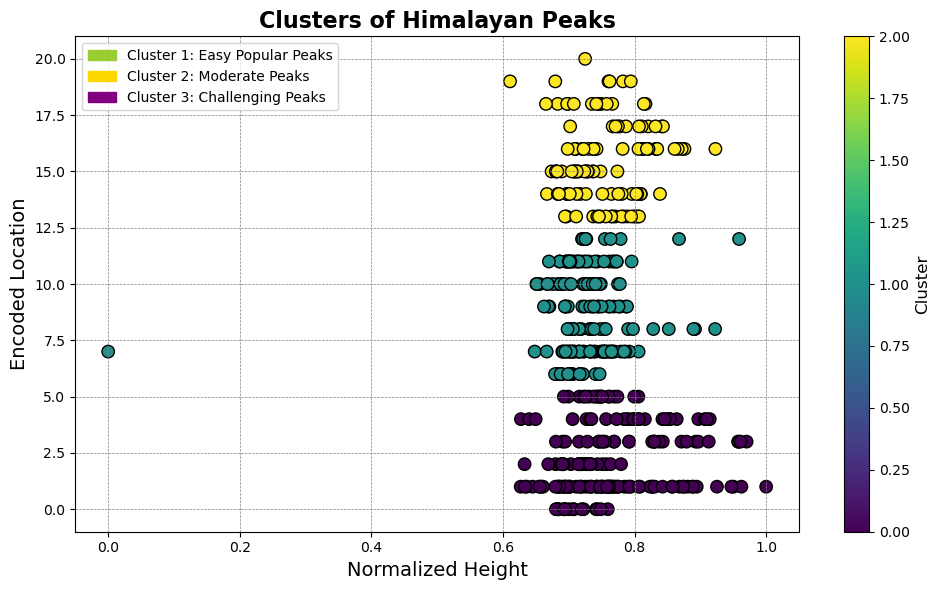

In [17]:
# Defining figure size for better clarity
plt.figure(figsize=(10, 6))

# Creating the scatter plot with improved style
scatter = plt.scatter(himalayan_peaks['Normalized_Hgt'], 
                       himalayan_peaks['Encoded_Location'], 
                       c=himalayan_peaks['Cluster'],
                       edgecolor='k',   
                       s=80)           


plt.title("Clusters of Himalayan Peaks", fontsize=16, fontweight='bold')

# Adding labels for x and y lables
plt.xlabel("Normalized Height", fontsize=14)
plt.ylabel("Encoded Location", fontsize=14)

# Adding the gridlines for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding a color bar with proper labeling
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster", fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Adding a custom legend defining the cluster's colors 
import matplotlib.patches as mpatches
legend_labels = [
    mpatches.Patch(color='yellowgreen', label="Cluster 1: Easy Popular Peaks"),
    mpatches.Patch(color='gold', label="Cluster 2: Moderate Peaks"),
    mpatches.Patch(color='purple', label="Cluster 3: Challenging Peaks"),
]
plt.legend(handles=legend_labels, loc='upper left', fontsize=10)



# Showing the plot
plt.tight_layout()  
plt.show()


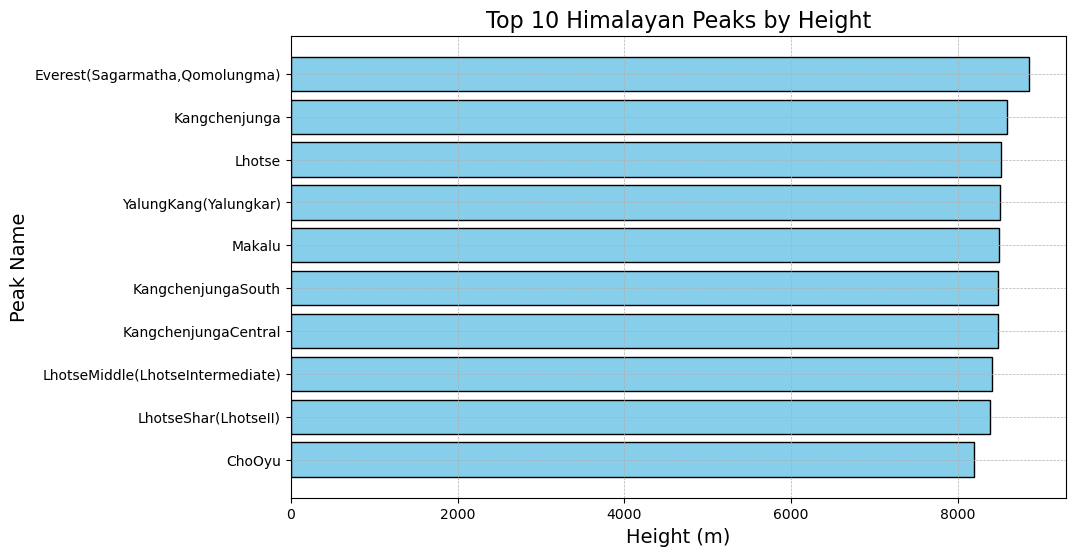

In [18]:
# Sorting peaks by height and selecting top 10
top_10_peaks_by_height = himalayan_peaks.sort_values(by='Hgt(m)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_peaks_by_height['PeakName(s)'], top_10_peaks_by_height['Hgt(m)'], color='skyblue', edgecolor='black')
plt.title('Top 10 Himalayan Peaks by Height', fontsize=16)
plt.xlabel('Height (m)', fontsize=14)
plt.ylabel('Peak Name', fontsize=14)
#Inverting y-axis to have the highest peaks on top
plt.gca().invert_yaxis()  
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


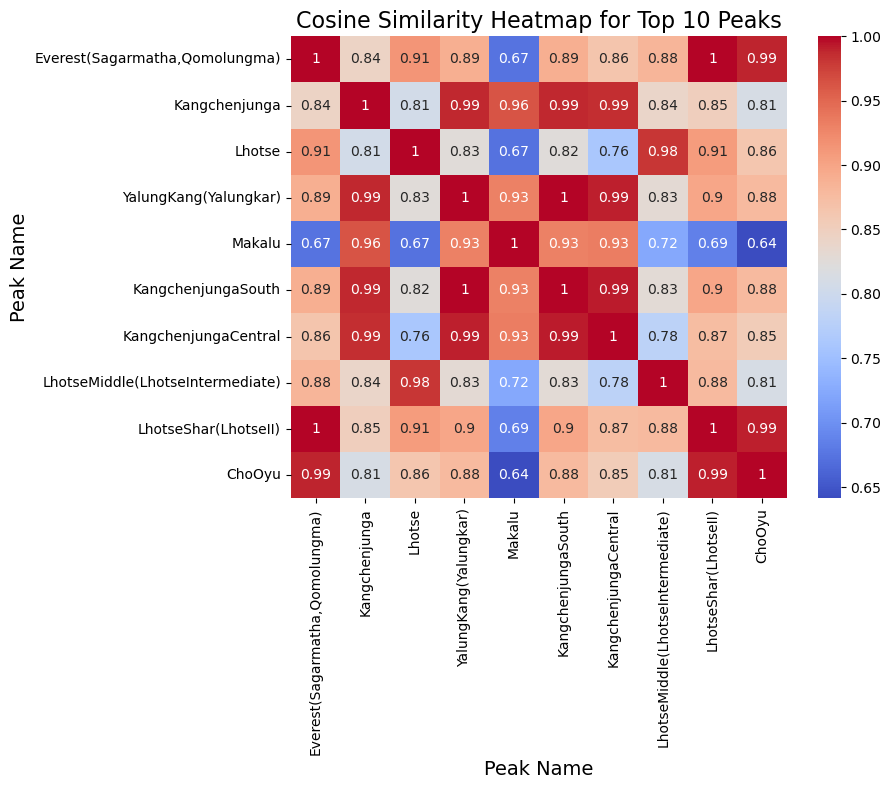

In [19]:
# Extracting features of the top 10 peaks
top_10_peaks = himalayan_peaks.sort_values(by='Hgt(m)', ascending=False).head(10)
features = top_10_peaks[['Normalized_Hgt', 'Encoded_Location', 'Normalized_Difficulty', 'Normalized_Popularity']]

# Calculating cosine similarity
cosine_sim = cosine_similarity(features)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', xticklabels=top_10_peaks['PeakName(s)'], yticklabels=top_10_peaks['PeakName(s)'])
plt.title('Cosine Similarity Heatmap for Top 10 Peaks', fontsize=16)
plt.xlabel('Peak Name', fontsize=14)
plt.ylabel('Peak Name', fontsize=14)
plt.show()


Creating a function to recommend peaks with user's input

In [20]:
# Importing tabulate library to show data in a tabular format
from tabulate import tabulate

# Function to recommend peaks
def recommend_peaks(preferred_peak, num_recommendations=5):
    # Checking whether the preferred peak exists in the dataset
    if preferred_peak not in himalayan_peaks['PeakName(s)'].values:
        raise ValueError(f"Peak '{preferred_peak}' not found in the dataset. Please provide a valid peak name.")
    
    # Locating the preferred peak's cluster
    preferred_cluster = himalayan_peaks[himalayan_peaks['PeakName(s)'] == preferred_peak]['Cluster'].values[0]
    cluster_data = himalayan_peaks[himalayan_peaks['Cluster'] == preferred_cluster].copy()
    
    # Checking if the number of recommendations is possible
    if num_recommendations > len(cluster_data):
        num_recommendations = len(cluster_data) - 1 
        print(f"Only {num_recommendations} recommendations available for this cluster.")
    
    # Extracting the features for similarity calculation
    features = cluster_data[['Normalized_Hgt', 'Encoded_Location', 'Normalized_Difficulty', 'Normalized_Popularity']]
    
    # Computing cosine similarity
    similarity_matrix = cosine_similarity(features)
    
    # Finding the index of the preferred peak
    preferred_index = cluster_data.index[cluster_data['PeakName(s)'] == preferred_peak].tolist()[0]
    cluster_data['Similarity'] = similarity_matrix[preferred_index]
    
    # Sorting by similarity and returning top recommendations
    recommendations = cluster_data.sort_values(by='Similarity', ascending=False).head(num_recommendations + 1)
    return recommendations[['PeakName(s)', 'Hgt(m)', 'Location(Himals)', 'Difficulty_Level', 'Popularity', 'Similarity']].iloc[1:]

Creating a Menu-Based Interaction for easiness

In [21]:
himalayan_peaks

,PeakID,Hgt(m),PeakName(s),Location(Himals),Difficulty_Level,Popularity,Normalized_Hgt,Normalized_Difficulty,Normalized_Popularity,Encoded_Location,Cluster
0,ACHN,6055,"Aichyn(Aychin,Ashvin)",Nalakankar/Chandi/Changla,1,30,0.684044,0.00,0.292929,0,0
1,AMAD,6814,AmaDablam(AmaiDablang),Khumbu,4,100,0.769874,0.75,1.000000,1,0
2,AMOT,6393,Amotsang(Amatson),Damodar,1,4,0.722266,0.00,0.030303,2,0
3,AMPG,5630,AmphuGyabjen,Khumbu,5,100,0.635983,1.00,1.000000,1,0
4,AMPH,6740,AmphuI,Khumbu,2,90,0.761506,0.25,0.898990,1,0
...,...,...,...,...,...,...,...,...,...,...,...
474,YARW,6644,Yarwa,Api/ByasRisi/Guras,3,66,0.750650,0.50,0.656566,5,0
475,YAUP,6422,Yaupa,Makalu,1,50,0.725546,0.00,0.494949,12,1
476,YNGS,6863,YangraKangriSouth(GaneshISouth),Ganesh/Shringi,3,93,0.775416,0.50,0.929293,14,2
477,YOKO,6423,Yokopahar(NampaVIII),Api/ByasRisi/Guras,4,95,0.725659,0.75,0.949495,5,0


In [ ]:
#CREATING a display_menu function
def display_menu():
    print("\nWelcome to the Himalayan Peaks Recommendation System!")
    print("1. View all the dataset")
    print("2. Enter a preferred peak name & get recommendations")
    print("3. Exit")

# Using while loop
while True:
    display_menu()
    choice = input("\nEnter any Option:").strip()
    
    # Handling choices
    if choice == '1':
        # Viewing the entire dataset
        print("\nDisplaying all Himalayan Peaks data:")
        # Displaying the dataset in a tabular format
        print(tabulate(himalayan_peaks, headers='keys', tablefmt='grid'))  
    
    elif choice == '2':
        # Getting user input for preferred peak and recommendations
        preferred_peak = input("\nEnter the name of your preferred peak: ").strip()
        
        try:
            # Input for the number of recommendations
            num_recommendations = int(input("How many peaks would you like to be recommended?: "))
            recommended_peaks = recommend_peaks(preferred_peak, num_recommendations)
            
            # Displaying recommendations in tabular format
            print("\nRecommended Peaks:")
            #Making Tabular output for recommendations
            print(tabulate(recommended_peaks, headers='keys', tablefmt='fancy_grid'))  
            
            # Asking user if they want to search for another peak
            again = input("\nWould you like to search for another peak? (yes/no): ").strip().lower()
            if again == 'yes':
                continue
            elif again == 'no':
                print("Thank you for using the Himalayan Peaks Recommendation System. May you reach new heights in your adventure. Safe travels!")
                break
            else:
                print("Invalid input, please enter 'yes' or 'no'.")
                
        except ValueError as e:
            print(f"Error: {e}. Please try again.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}. Please try again.")
    
    elif choice == '3':
        print("Thank you for using the Himalayan Peaks Recommendation System. May you reach new heights in your adventure. Safe travels!")
        break
    
    else:
        print("Invalid choice, please try again.")


Welcome to the Himalayan Peaks Recommendation System!
1. View all the dataset
2. Enter a preferred peak name & get recommendations
3. Exit
